<a href="https://colab.research.google.com/github/DiogodosSantosS/DiogodosSantosS/blob/main/EDA_Developer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The study of this dataset was made during the course "Handling Missing Data" from the website:
https://www.codecademy.com/

In the end I've got a certificate for the completion of this course.

### Explore data

In this study case, we decide to start by performing some Exploratory Data Analysis (EDA). This will provide us with a high-level understanding of the data fields, as well as help us identify which columns have missing data. In this case, we load the dataset into a pandas DataFrame and call it df. After that, we'll take a moment to explore which columns we have in the data.

In [9]:
import pandas as pd

df = pd.read_csv('developer_dataset.csv')

#Explore all the columns
print(df.columns)

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
#see a row count for each column

df.count()

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

In [11]:
#summary statistics on the dataset

df.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


* Are there columns that have more missing data than 
others?
* Which columns seem interesting?
What insights would you want to gain from the data?
* Are there columns that have potentially more sensitive data than others? How would that change our strategies in dealing with them?

### Delete highly missing data

In order do select which columns will be worth it to work with, I'll check which ones have more than 60% of the corresponding values, present.

In [12]:
#The code allows us to see the percentage missing data for each column.

maxRows = df['RespondentID'].count()

print('% Missing Data: ')
print((1 - df.count() / maxRows) * 100)

% Missing Data: 
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


Based on the above numbers, you assume that it is safe to remove the following columns:

* NEWJobHunt
* NEWJobHuntResearch
* NEWLearn

In [13]:
#Use pandas to drop the DataFrame columns with less than 60% of the values.

df.drop(['NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn'],
axis = 1,
inplace = True)

### Analyze developers by country

What questions should we ask the data?

Determine what kind of missing data we have for employment and developer type. One way to do that is check, at a country level, where the data is missing for each field:

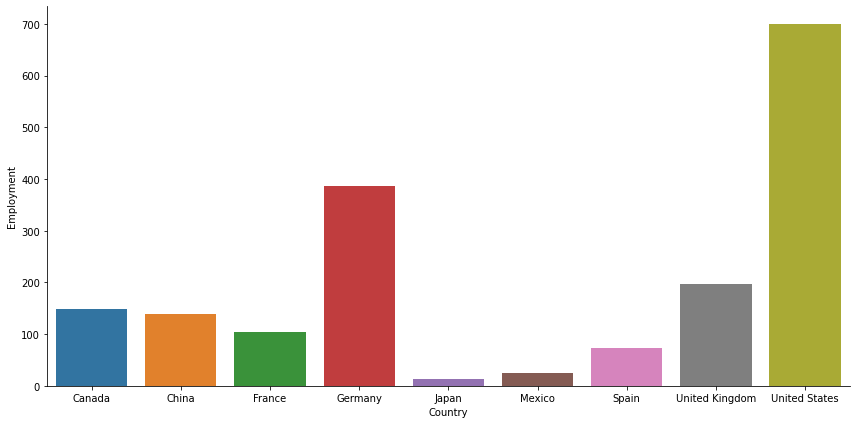

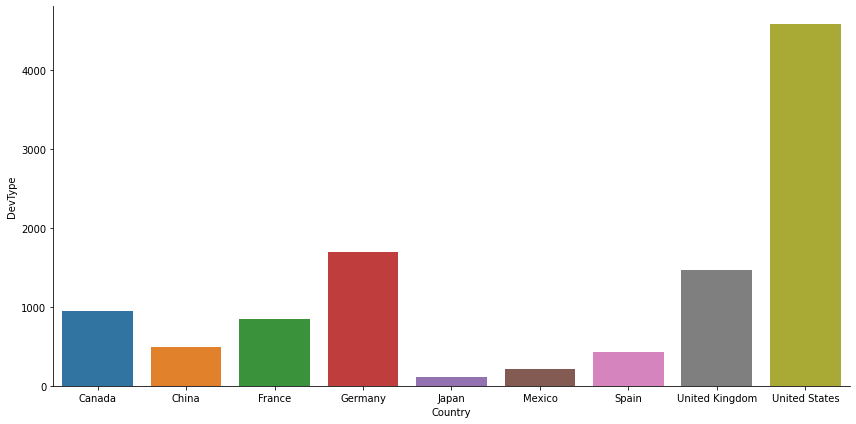

In [27]:
#import libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

df[['RespondentID', 'Country']].groupby('Country').count()

missingData = df[['Employment', 'DevType']].isnull().groupby(df['Country']).sum().reset_index()

A = sns.catplot(
    data = missingData, kind = 'bar',
    x = 'Country', y = 'Employment',
    height = 6, aspect = 2)

B = sns.catplot(
    data = missingData, kind = 'bar',
    x = 'Country', y = 'DevType',
    height = 6, aspect = 2)

We can see from the above plots, the data doesn’t appear to be missing for any country significantly more than any other. Using our domain knowledge, we understand that the missing data appears to scale with the relative size of each country (e.g. there is more missing data in the United States vs. Japan because there will be more respondents there). We also note that the United States and Germany have significantly more developers (on average) than the other countries, explaining why they have more missing data points.

We determine that the missing data for these two columns can be categorized as MCAR (Missing Completely At Random). This means we can safely delete the rows that have missing data in these columns! This is a prime example of where we can employ Pairwise Deletion to only delete rows that have missing data for either Employment or DevType:

In [28]:
#Droping null values
df.dropna(subset = ['Employment', 'DevType'],
          inplace = True,
          how = 'any')

Now we can analyze the distribution of employment and developer types by country. We decide to aggregate the employment data by key developer roles that align with major parts of the development lifecycle:
* Front-end
* Back-end
* Full-stack
* Mobile development
* Administration role

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


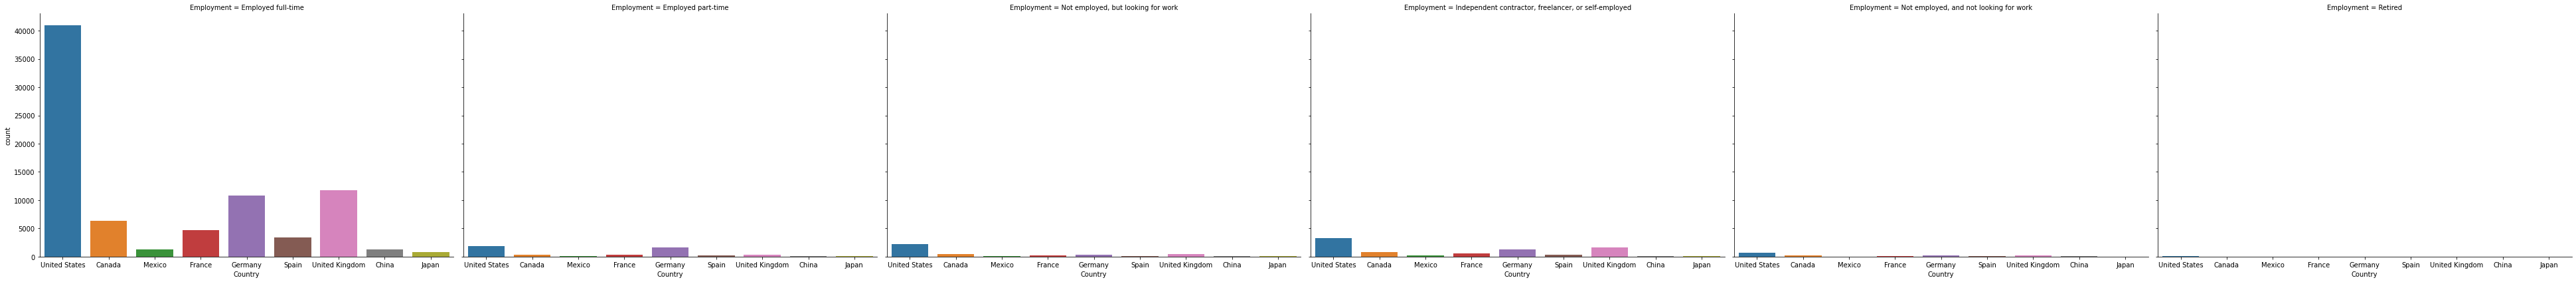

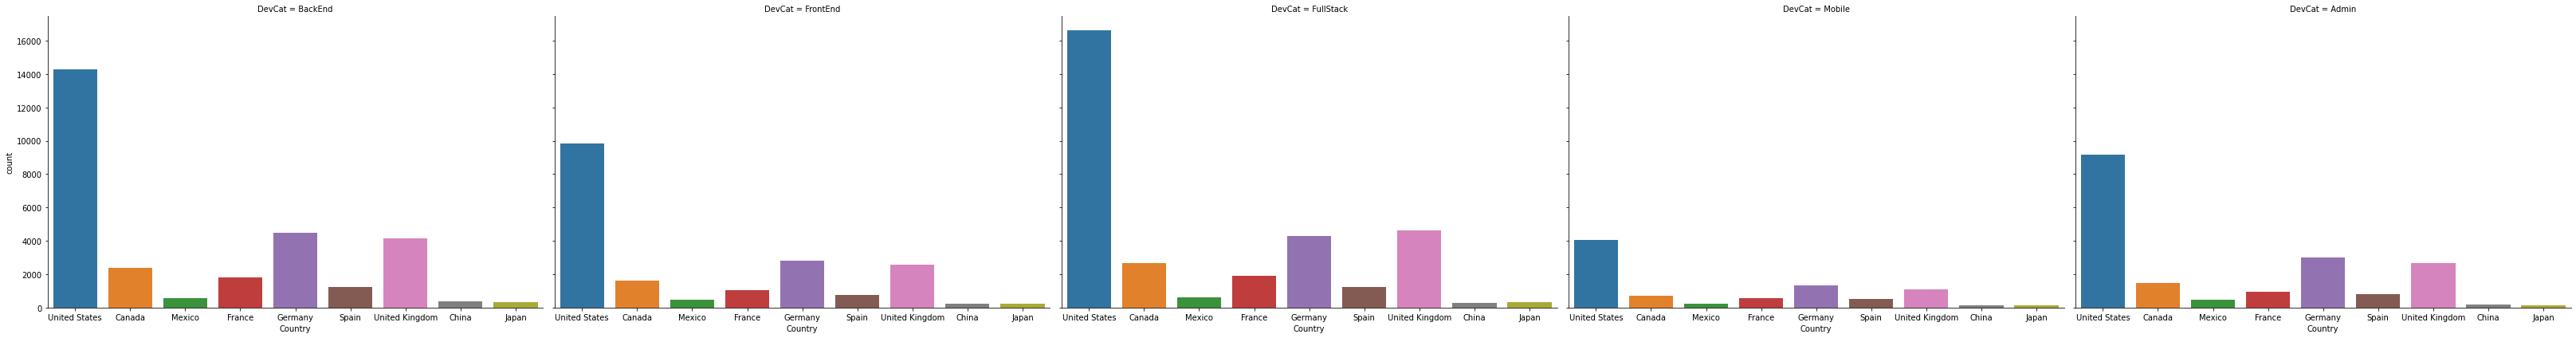

In [29]:
empfig = sns.catplot(x="Country", col="Employment",
                data=df, kind="count",
                height=6, aspect=1.5);
 
# Focus on a few of the key developer types outlined in the Stack Overflow survey
devdf = df[['Country','DevType']]
devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'FullStack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administrator'), 'Admin'] = True
 
devdf = devdf.melt(id_vars=['Country'], 
    value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin'], 
    var_name='DevCat',
    value_name='DevFlag')
 
devdf.dropna(how='any', inplace=True)
 
devFig = sns.catplot(x="Country", col="DevCat",
                data=devdf, kind="count",
                height=6, aspect=1.5);

We see that the vast majority of respondents are employed full-time. Since these developers are mainly employed, this data will be relevant for a client who wants to see what developers look for in a potential job. 
We also see that the majority of developers will have skill sets in front-end, back-end, or full-stack development. This is interesting, and shows that the market values developers who can excel in at least a major part of the development lifecycle, if not the entire stack.

# Investigate developer undergraduate majors

As we saw before, you are missing about 11% of the data for UndergradMajor. Why do you think this data is missing? Could something have happened over the course of these three years? Is the fact that data is missing accurate?

To test this theory, we'll take a look at the distribution of majors over each year:

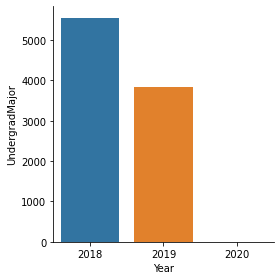

In [31]:
missingUndergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()
 
sns.catplot(x = "Year", y = "UndergradMajor",
                data = missingUndergrad, kind = "bar",
                height = 4, aspect = 1);

All of the data for 2020 undergrad majors is filled in, indicating that each participant in these surveys had some level of decision for their undergrad major.

The interest is in what major a person ultimately landed on, as this would be the educational background they would carry into a job search. We want to carry that value backwards for each participant to fill in any missing data. This is a great use for one of our Single Imputation techniques: NOCB (Next Observation Carried Backward)! Fill in the gaps using NOCB:

In [32]:
# Sort by ID and Year so that each person's data is carried backwards correctly
df = df.sort_values(['RespondentID','Year'])
 
df['UndergradMajor'].bfill(axis=0, inplace=True)

From here, we analyze the major distribution for each year, using a vertical bar chart visualization:

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

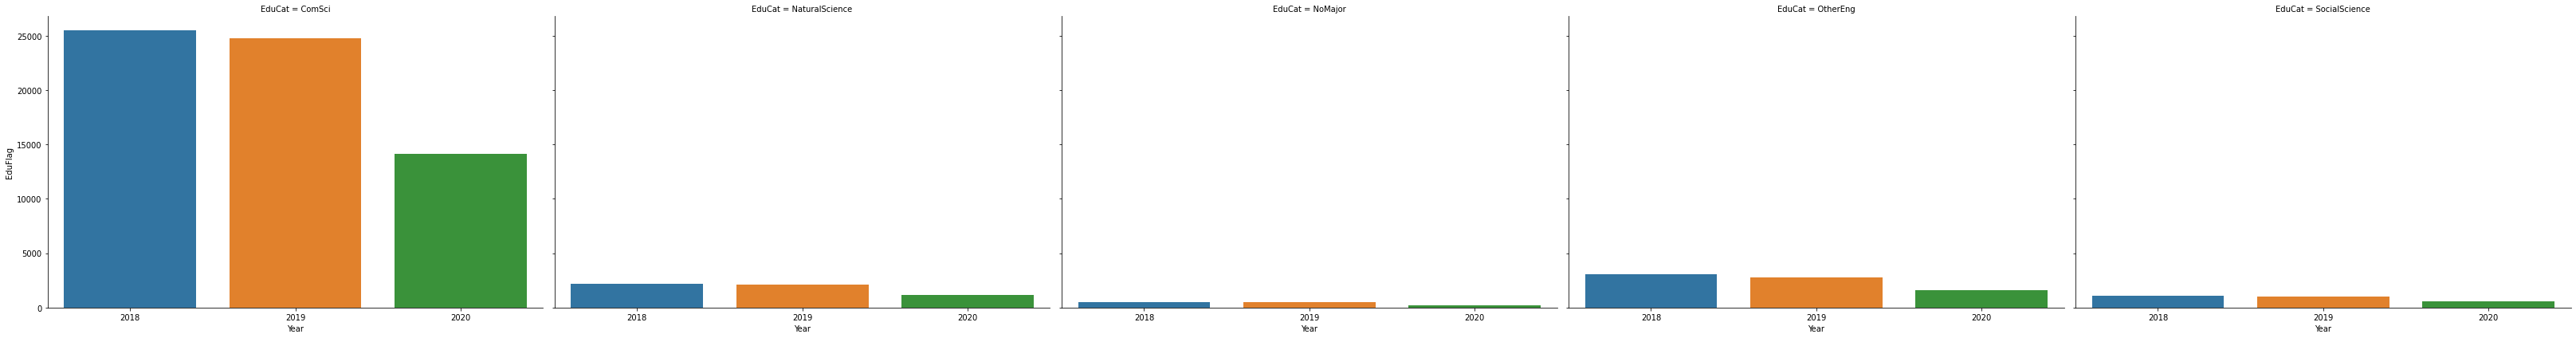

In [33]:
# Key major groups outlined in the Stack Overflow survey
majors = ['social science','natural science','computer science','development','another engineering','never declared']
 
edudf = df[['Year','UndergradMajor']]
edudf.dropna(how='any', inplace=True)
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True
 
edudf = edudf.melt(id_vars=['Year'], 
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'], 
    var_name='EduCat',
    value_name='EduFlag')
 
edudf.dropna(how='any', inplace=True)
edudf = edudf.groupby(['Year','EduCat']).count().reset_index()
 
eduFig = sns.catplot(x = "Year", y = 'EduFlag', col = "EduCat",
                data = edudf, kind = "bar",
                height = 6, aspect = 1.5);

We notice that the vast majority of people who enter the workforce for development have some background in a Computer Science major. Interestingly, however, the number of Computer Science majors significantly declined over the years surveyed, indicating that there could be other majors that have successfully entered the workforce for their desired job. This would require further analysis and could allow an individual to pursue a separate education path and still end up in some kind of developer role.

# Examine the relationship between years of experience and compensation

At this point, we have studied the demographics of developers around the world, from where they live to the education paths they have taken. Now, we turn your focus to the various aspects that would influence the job-hunting process.

Years of experience are an important metric when looking to understand the general skill and technical capabilities of a potential candidate. Compensation is also important for our client to understand what the “going rate” for a particular developer is in today’s market. We might assume that there is a strong correlation between experience and job compensation, making it an excellent hypothesis to explore.

In order to understand a bit about the data for each of these two fields, we perform some more exploratory analysis:

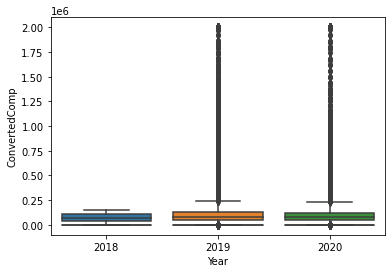

In [34]:
compFields = df[['Year','YearsCodePro','ConvertedComp']]
 
D = sns.boxplot(x="Year", y="YearsCodePro",
            data=compFields)
 
E = sns.boxplot(x="Year", y="ConvertedComp",
            data=compFields)

We see that although there are some outlier data points for each column, the overall distribution is fairly consistent year-over-year. This indicates that there is a strong correlation between the data points, which should tell a good story about how experience can translate into compensation. Since there is a clear trend with the data points, we decide the best method for filling in the missing data for these two columns is through Multiple Imputation:

In [35]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
 
imputedf = df[['YearsCodePro','ConvertedComp']]
 
traindf, testdf = train_test_split(imputedf, train_size=0.1)
 
# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)
 
# Fit the model to the the test dataset
imp.fit(imputedf)
 
# Transform the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf),0), columns=['YearsCodePro','ConvertedComp'])

The above code will loop through (up to 20 times), and fill in the missing data based on the context provided by the other column. This should create data points that are indicative of the overall trend of the data. Now, you can analyze the relationship between YearsCodePro and CinvertedComp through the use of a boxplot like so:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


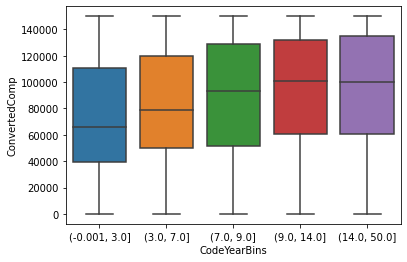

In [36]:
compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]
compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)
 
sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=compPlotdf)

The plot above validates our hypothesis from before. While there are high (and low) earning developers at every experience level, experience appears to correlate with compensation. The more experienced a developer was, the more (on average) they were compensated.

# Summary and Results

At this point, we have analyzed information about the developer community from a variety of points of view. Our client understands the global presence of the developer community, their varied backgrounds, and how their experience translates into compensation. Overall, these statistical analyses can guide actions in moving forward with a staffing plan that aligns with your client’s growth plan and technical requirements.

By using a variety of techniques for handling missing data, we were able to reliably curate a cleaner dataset to fuel this set of analyses. These strategies allow us to salvage otherwise messy data, and should help us in the future with other datasets.

# Dataset Acknowledgements

The dataset provided is the result of a series of surveys hosted by Stack Overflow to understand their developer community. For the purposes of this project, the dataset has been slightly modified for the years 2018-2020.